# B-BOP Time Estimator 
### V0.2

This is a JupyterLab Notebook, based on the `TimeEstimator3.py` script written by M. Sauvage. 

* **07/04/2020** First JupyterLab version - VRE
* **27/06/2020** Adapted to new TimeEstimator Version - VRE


### Things to do in the future :

* Add the _getMyObsTime_ Function
* Add the 5 options of regions in the ecliptic that give typical background values.
* Change the user-interaction process using py-widgets (PANEL and/or Bokeh)
---

## How to use this Online Time Estimator?
* Each cell is editable (a cell is defined by the greyed out spaces below)
* To execute a cell : click inside and type ***SHIFT-ENTER***.
* Cell #1 needs to be executed once and should print *`--- Time Estimator is ready for use ---`* if correctly compiled.
* Cells #2 and #3 can be modified without re-executing Cell #1.

---

## 1. Import the Time Estimator Python Module

In [1]:
import importlib
import pandas as pd
import numpy as np
import timeEstimator3 as te

from IPython.display import Markdown, display

--- Time Estimator is ready for use ---




## 2. Definition of Mapping and Telescope parameters
* you can directly edit the numerical values in the cells below.
* **Then type *SHIFT-ENTER* to execute.**

> **NOTES** :   
> * The user provided signal-to-noise (ston) parameter is a _target_ SNR on the final image that refers to a post-photometric measurement state of the data.  For extended sources, that means a substraction of the background.  For point sources, the photometry is performed using aperture photometry (the source power is distributed within _N_ pixels, and the background is substracted).  
> * The sensitivity calculated by this code is the limit Source flux that can be detected, with the signal-to-noise specified by the user.




In [2]:
### Define the desired Signal to Noise Ratio (ston) and the Area of the map (area)
### ston is dimensionless
### area is in degree

ston=5   # Signal To Noise
area=1   # the area of the map (degrees)

### Define the Polarization fraction (the user provides a representative polarization fraction)
### The signal to noise is considered for the polarization fraction

pfrac=10


Below are the telescope parameters that are fixed *in principle*. Default values are supposed to be up to date, but it is of course possible to modify them.

(this cell does not need to be executed as long as the following parameters are not modified).

In [3]:
### Telescope Parameters
#importlib.reload(te)

te.zodiTemp=265
te.telDiam=2.7
te.telTemp=8.0
te.telEmissivity=0.09

## 3. Results
The following parameters are computed :

* **NEP** corresponds to the photon NEP at pixel level by default. 
 Use option `withDet=True` to compute the "full" NEP (Photon + detector). 

* **FWHM** This is the beam Field Width at Half Maximum for each band.

* **Map Sensitivity** It is given in MJy/sr for extended sources and mJy for point sources.

* **Polarization Map Sensitivity** 

Assuming polarisation fraction has been provided in %


# Results

* **The User-Defined Signal-To-Noise is : 5**

* **The User-Defined Area to Map is 1°**

* **The Polarization Fraction of the source is 10%**

,Band 1,Band 2,Band 3
FWHM (arcsec),5.04,14.41,25.21
NEP (1E18 W.Hz$^{-1/2}$),1.03,0.75,2.41
Sensitivity (ext. sources) (MJy/sr),0.35,0.12,0.07
Sensitivity (point sources) (mJy),0.41,1.13,2.32
Pol. Sensitivity (ext. sources) (MJy/sr),5.00,1.71,0.93
Pol. Sensitivity (point sources) (mJy),5.81,16.18,33.21


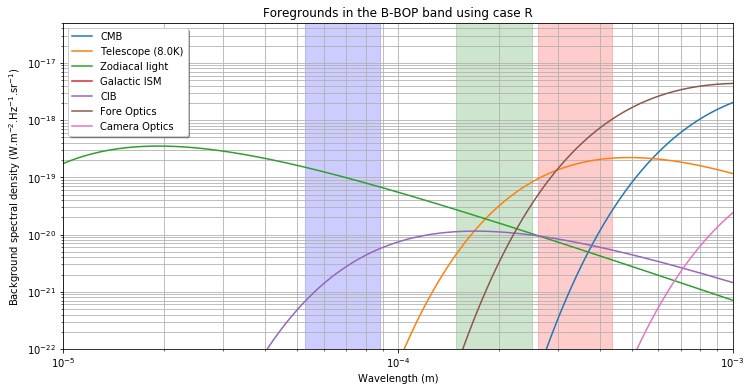

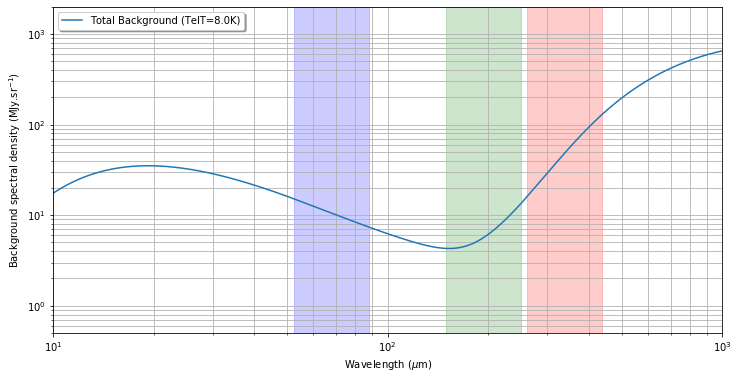

In [4]:
NamePerf=["FWHM  (arcsec)", "NEP (1E18 W.Hz$^{-1/2}$)", "Sensitivity (ext. sources) (MJy/sr)","Sensitivity (point sources) (mJy)", "Pol. Sensitivity (ext. sources) (MJy/sr)","Pol. Sensitivity (point sources) (mJy)" ]


############## FWHM ##############
F1=te.getBeamProfile(fwhm='true')
dT=np.array(F1)


############## NEP ##############
# Parameters
withDet=False

#
N1=1E18*te.getNEP(band=1, withDet=withDet, silent='True')
N2=1E18*te.getNEP(band=2, withDet=withDet, silent='True')
N3=1E18*te.getNEP(band=3, withDet=withDet, silent='True')

dT=np.vstack((dT,[N1,N2,N3]))

############## MAP Sensitivity (Intensity) ##############
Sensiv=te.getSensitivity(ston,area,silent=True)

dT=np.vstack((dT,Sensiv[:2]))

############## MAP Sensitivity (Polarization) ##############
SensivP=te.getSensPolar(pfrac,ston,area,silent='true')

dT=np.vstack((dT,SensivP[:2]))

############## Builds the Table ##############
#dataTable={'Band 1':[N1, F1[0], Sensiv[0,0], Sensiv[1,0]], 'Band 2':[N2, F1[1], Sensiv[0,1], Sensiv[1,1]], 'Band 3':[N3, F1[2], Sensiv[0,2], Sensiv[1,2]]}
dt=pd.DataFrame(data=dT, index=NamePerf, columns=['Band 1','Band 2', 'Band 3'])
pd.set_option('display.precision', 2)
#dataTable_Frame.style.set_properties(**{'font-size': '20pt'})
#dataTable_Frame.style.hide_index()
dt.style.set_properties(**{'font-size': '15pt'})\
    .set_precision(2)


############## Plots of the Background per pixel ##############
te.mkForegroundFig()
display(Markdown('# Results'))
display(Markdown('* **The User-Defined Signal-To-Noise is : {}**'.format(ston)))
display(Markdown('* **The User-Defined Area to Map is {}°**'.format(area)))
display(Markdown('* **The Polarization Fraction of the source is {}%**'.format(pfrac)))
display(dt)
